In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
from typing import List, Dict, Optional

In [2]:
"""
Test your implementation on the Boston housing dataset (to predict the median house price, i.e., y). Use the train and test splits provided on course website. 

- Try l = 0, 10 and report your training error, training loss and test error. 
- [Your training loss should monotonically decrease during iteration; if not try to tune your step size h , e.g. make it smaller.]
"""
## Load Training Data
TRAIN_DATA_X= np.loadtxt(open("a1-files/housing_X_train.csv"), delimiter=",")
TRAIN_DATA_y = np.loadtxt(open("a1-files/housing_y_train.csv"), delimiter=",")
## Load Test Data
TEST_DATA_X = np.loadtxt(open("a1-files/housing_X_test.csv"), delimiter=",")
TEST_DATA_y = np.loadtxt(open("a1-files/housing_y_test.csv"), delimiter=",")

In [3]:
def gradient_descent_ridge_regression_training(
    X: List[List[float]], 
    y: List[float], 
    # Configuration with Default Settings
    max_pass: int   = 500,
    eta: float      = 0.3, # >0
    tol: float      = 0.1, # >0
    lamb: float     = 0,   # Try \in {0,10}
    error_tol: Optional[float] = None,
)-> [List[float], float, Dict]:
    """
    @param          X: \in R^{nxd}
    @param          y: \in R^n 
    @param   max_pass: \in N
    @param        eta: step size
    @param        tol: tolerance
    @param       lamb: regulation weight '\lambda'
    """
    XT = X
    X = np.transpose(XT)
    y = np.array(y)
    [n, d] = np.shape(X) 
    w = np.zeros(d) # w = 0_d
    b = 0
    mistake = []
    # optimization: pre-compile
    div = 1/n 
    # logger
    training_log = {
        "t" : [],
        "w" : [],
        "b" : [],
        "training_error": [],
        "training_loss": [],
    }
    # training
    for t in range(0, max_pass): # max passes / iterations
        pw = copy.deepcopy(w)
        # update:
        f_err = ( np.dot(X, w) + b - y ) # pred - y
        dw = div * np.dot(XT, f_err) + 2 * lamb * w
        db = div * np.sum(f_err) # 1^T f_err
        w = w - eta * dw
        b = b - eta * db
        # compute loss and error:
        error = div / 2 * (np.linalg.norm(f_err) ** 2)
        loss = error + lamb * (np.linalg.norm(w) ** 2)
        # log progress:
        training_log["t"].append(t)
        training_log["w"].append(w)
        training_log["b"].append(b)
        training_log["training_error"].append(error)
        training_log["training_loss"].append(loss)
        # stopping criteria:
        if error_tol is None:
            if np.linalg.norm(pw - w) <= tol: # can use other stopping criteria
                break # STOPPING
        else:
            if error <= error_tol:
                break # STOPPING
    
    return w, b, training_log

def predict_and_evaluate(
    X: List[List[float]], 
    y: List[float], 
    w: List[float], 
    b: float,
) -> [List[float], float]:
    """
    Perform Prediction and Evaluate
    """
    # test:
    X = np.transpose(X)
    [n, d] = np.shape(X) 
    y_pred = np.dot(X, w) + b
    f_err = y_pred - y 
    test_error = 1/n * 1/2 * (np.linalg.norm(f_err) ** 2)
    return y_pred, test_error

def print_report(
    training_log: Dict,
    test_error: float,
    tag: str,
):
    # plot status
    fig1 = plt.gcf()
    ax1 = plt.subplot(211)
    plt.plot(training_log["t"], training_log["training_error"])
    plt.title("Training Progress")
    plt.ylabel("Training Error")
    # plt.savefig('figs/ex3-2_training_progress.png')
    ax2 = plt.subplot(212, sharex=ax1)
    plt.plot(training_log["t"], training_log["training_loss"])
    plt.ylabel("Training Loss")

    plt.xlabel("iteration")
    plt.show()
    fig1.savefig("figs/ex3-2_training_progress_{tag}.png".format(
        tag = tag
    ), bbox_inches = 'tight')

    print(training_log["t"][-1])
    print("> [{tag:8s}] T: {itr:3d} | Training Error: {train_err:.5f} \
        | Training Loss: {train_loss:.5f} | Test Error: {test_err:.5f}".format(
        tag         = tag,
        itr         = training_log["t"][-1],
        train_err   = training_log["training_error"][-1],
        train_loss  = training_log["training_loss"][-1],
        test_err    = test_error
    ))


In [4]:
COMMON_MAX_PASS     = 10000
COMMON_ETA          = 1e-7 # >0
COMMON_TOLERANCE    = 5e-5 # >0
COMMON_ERR_TOL      = 35.8 # Disable: None
w1, b1, training_log1 = gradient_descent_ridge_regression_training(
    X = TRAIN_DATA_X,
    y = TRAIN_DATA_y,
    # Configuration with Default Settings
    max_pass = COMMON_MAX_PASS,
    eta      = COMMON_ETA, 
    tol      = COMMON_TOLERANCE, 
    lamb     = 0,   # Try \in {0,10}
    error_tol = None,
)
w2, b2, training_log2 = gradient_descent_ridge_regression_training(
    X = TRAIN_DATA_X,
    y = TRAIN_DATA_y,
    # Configuration with Default Settings
    max_pass = COMMON_MAX_PASS,
    eta      = COMMON_ETA, 
    tol      = COMMON_TOLERANCE, 
    lamb     = 10,   # Try \in {0,10}
    error_tol = None,
)
w3, b3, training_log3 = gradient_descent_ridge_regression_training(
    X = TRAIN_DATA_X,
    y = TRAIN_DATA_y,
    # Configuration with Default Settings
    max_pass = COMMON_MAX_PASS,
    eta      = COMMON_ETA, 
    tol      = COMMON_TOLERANCE, 
    lamb     = 0,   # Try \in {0,10}
    error_tol = COMMON_ERR_TOL,
)
w4, b4, training_log4 = gradient_descent_ridge_regression_training(
    X = TRAIN_DATA_X,
    y = TRAIN_DATA_y,
    # Configuration with Default Settings
    max_pass = COMMON_MAX_PASS,
    eta      = COMMON_ETA, 
    tol      = COMMON_TOLERANCE, 
    lamb     = 10,   # Try \in {0,10}
    error_tol = COMMON_ERR_TOL,
)

In [5]:
# TODO: validation and testing: "predict_and_evaluate"
y_pred1, test_error_1 = predict_and_evaluate(X= TEST_DATA_X,y= TEST_DATA_y,w= w1,b= b1)
y_pred2, test_error_2 = predict_and_evaluate(X= TEST_DATA_X,y= TEST_DATA_y,w= w2,b= b2)
y_pred3, test_error_3 = predict_and_evaluate(X= TEST_DATA_X,y= TEST_DATA_y,w= w3,b= b3)
y_pred4, test_error_4 = predict_and_evaluate(X= TEST_DATA_X,y= TEST_DATA_y,w= w4,b= b4)

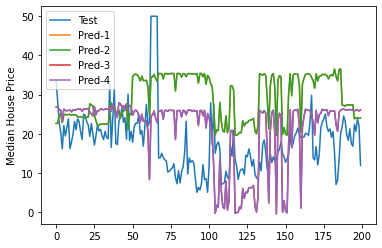

In [6]:
# [Not-required] to show the difference between true y vs. predicted y
fig1 = plt.gcf()
plt.plot(TEST_DATA_y)
plt.plot(y_pred1)
plt.plot(y_pred2)
plt.plot(y_pred3)
plt.plot(y_pred4)
plt.ylabel("Median House Price")
plt.legend(["Test", "Pred-1", "Pred-2","Pred-3","Pred-4"])
plt.show()
fig1.savefig("figs/ex3-2_testint_result.png", bbox_inches = 'tight')

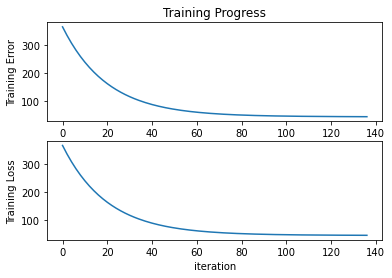

136
> [lam=0   ] T: 136 | Training Error: 44.42208         | Training Loss: 44.42208 | Test Error: 108.42167


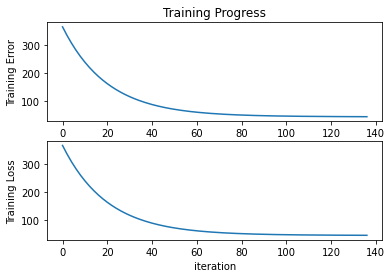

136
> [lam=10  ] T: 136 | Training Error: 44.42367         | Training Loss: 44.44802 | Test Error: 108.39676


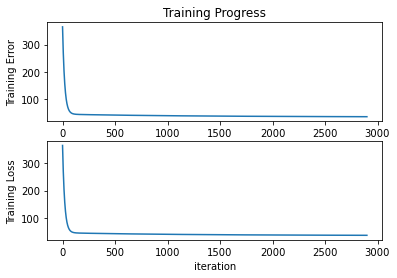

2899
> [lam=0,ES] T: 2899 | Training Error: 35.79958         | Training Loss: 35.79958 | Test Error: 49.89885


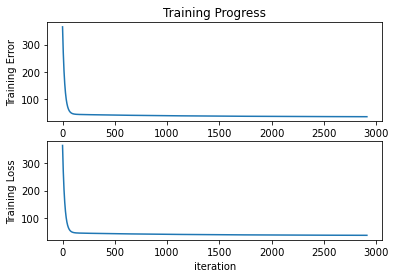

2911
> [lam=10,ES] T: 2911 | Training Error: 35.79973         | Training Loss: 35.84981 | Test Error: 49.88967


In [7]:
# Generate Report #
print_report(training_log=training_log1,test_error=test_error_1,tag="lam=0")
print_report(training_log=training_log2,test_error=test_error_2,tag="lam=10")
print_report(training_log=training_log3,test_error=test_error_3,tag="lam=0,ES")
print_report(training_log=training_log4,test_error=test_error_4,tag="lam=10,ES")